# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "43970d97271f0695dc1dbcb1e38ae45d"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace('','+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
City not found. Skipping...
Processing Record 2 of Set 1 | tiksi
City not found. Skipping...
Processing Record 3 of Set 1 | majene
City not found. Skipping...
Processing Record 4 of Set 1 | vaini
City not found. Skipping...
Processing Record 5 of Set 1 | strezhevoy
City not found. Skipping...
Processing Record 6 of Set 1 | mataura
City not found. Skipping...
Processing Record 7 of Set 1 | lafia
City not found. Skipping...
Processing Record 8 of Set 1 | saint-philippe
City not found. Skipping...
Processing Record 9 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 10 of Set 1 | pontian kecil
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 12 of Set 1 | fortuna
City not found. Skipping...
Processing Record 13 of Set 1 | chuy
City not found. Skipping...
Processing Record 14 of Set 1 | champerico
City n

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv(r"/Users/noorzaki/Desktop/module 6 challenge/python-api-challenge/output_data/cities.csv")

# Show Record Count
city_data_df.count()

City_ID       577
City_ID.4     577
City_ID.3     577
City_ID.2     577
City_ID.1     577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [47]:
# Display sample data
city_data_df.head()
city_data_df

,City_ID,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,572,572,572,572,572,sovetskiy,61.3614,63.5842,3.93,96,100,3.71,RU,1666108564
573,573,573,573,573,573,tatarsk,55.2190,75.9828,3.78,89,84,2.63,RU,1666108564
574,574,574,574,574,574,canchungo,12.0672,-16.0333,35.07,61,67,2.91,GW,1666108565
575,575,575,575,575,575,iquique,-20.2208,-70.1431,17.02,68,6,3.50,CL,1666108566


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/noorzaki/Desktop/module 6 challenge/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("/Users/noorzaki/Desktop/module 6 challenge/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.5,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,,,
0,0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

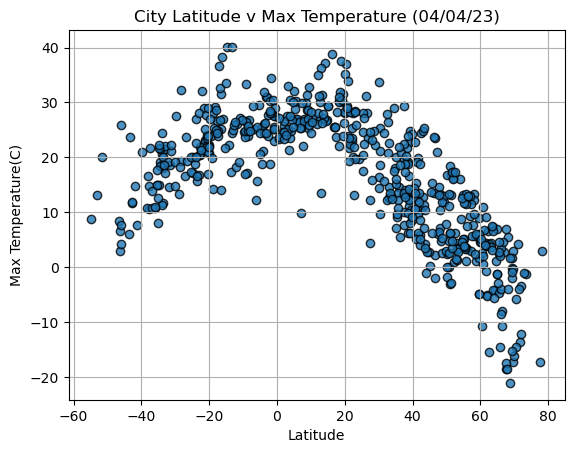

In [50]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lats, max_temps, edgecolors="black", linewidths=1, marker= "o", alpha=0.8, label= "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude v Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

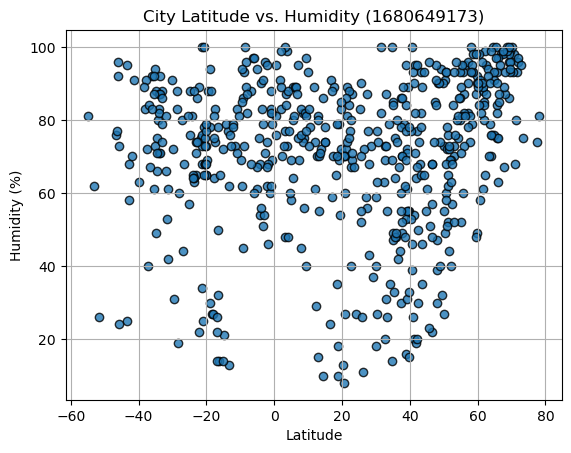

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolors="black", linewidths=1, marker="o",alpha=0.8, label="cities" )

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%s)" % time.strftime("%s"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

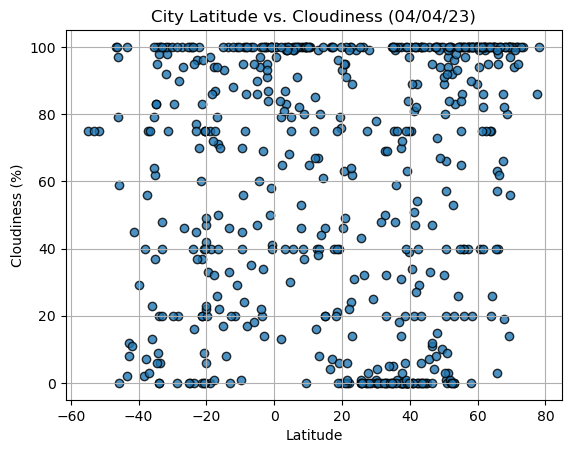

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

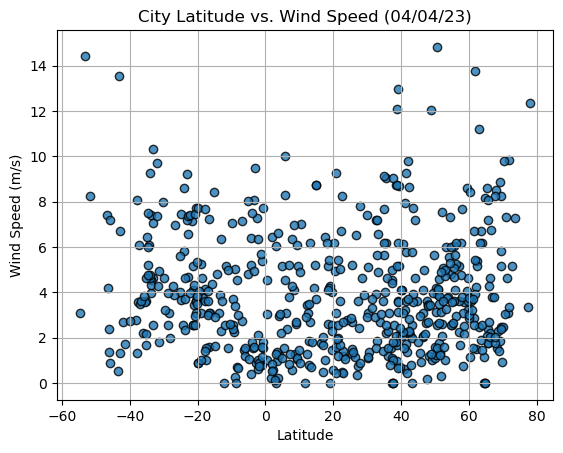

In [53]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolors="black",linewidths=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy.stats import linregress
def plot_lingress(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values* slope + intercept
    #equation for the regression line
    line_equation = "y=" + str(round(slope,2))+"x+" + str(round(intercept,2))

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_filter =city_data_df ["Lat"] >= 0
northern_hemi_df = city_data_df[northern_hemi_filter]

# Display sample data
northern_hemi_df.head()

,City_ID.5,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,,,
0,0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,6,6,6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_filter = city_data_df["Lat"] < 0
southern_hemi_df = city_data_df[southern_hemi_filter]

# Display sample data
southern_hemi_df.head()

,City_ID.5,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,,,
2,2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,5,5,5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,7,7,7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,9,9,9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,10,10,10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


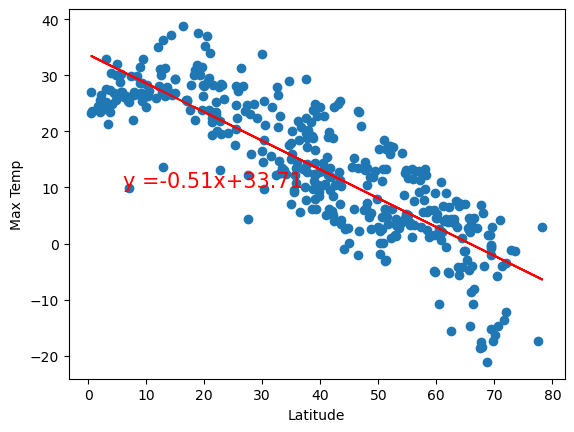

In [57]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y =" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(f"The r-value is: 0.7161472181434118")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.4121057168607245


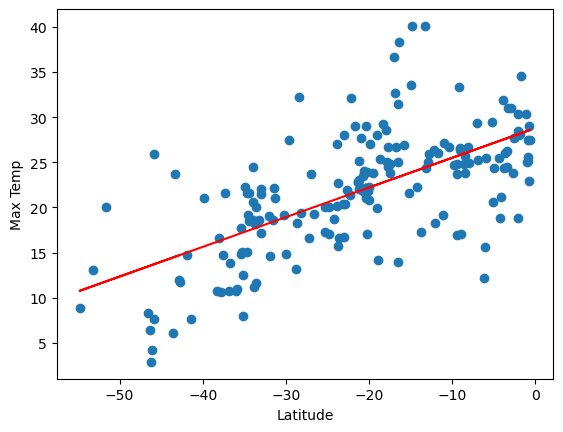

In [58]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y =" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(f"The r-value is: 0.4121057168607245")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** 
the temperature vs. latitude regression plot shows that in the northern hemisphere as you move away from the equator the temperature decreases.
while the southern hemisphere regression plot shows a positive correlation which mean the closer you move to the equator the higher the temperature goes 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5689741545789598


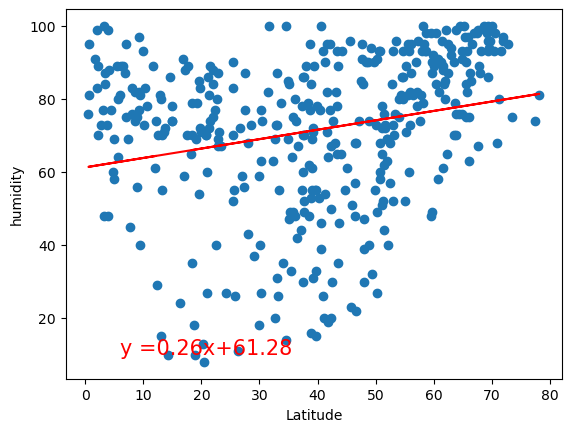

In [59]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y =" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(f"The r-value is: 0.5689741545789598")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.show()

The r-value is: 0.0002808747046324607


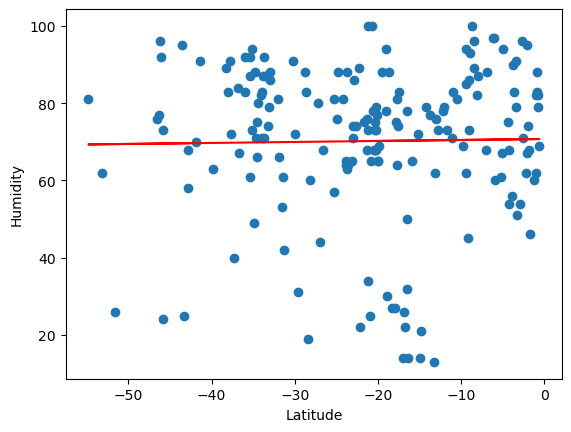

In [60]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y =" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(f"The r-value is: 0.0002808747046324607")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** 
in the southern hemisphere the regression doesnt show much of a coreelation between the data sets. its a constant slope.
in the northern hemisphere it looks like theres a regression that slowly increases as humidity increasees and latitude as well


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10118522354150992
y=0.31x + 48.5


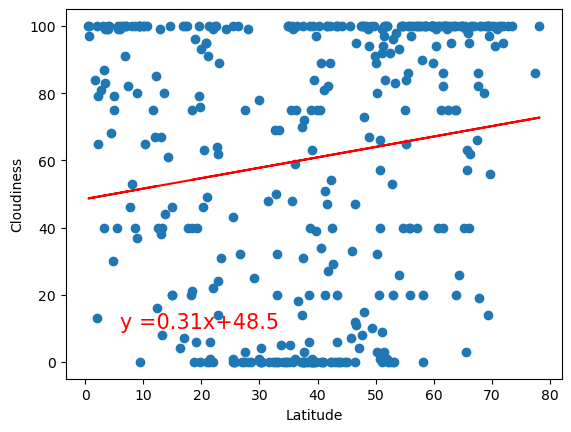

In [65]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y =" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(f"The r-value is: 0.10118522354150992")
print(f"y=0.31x + 48.5")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.02056735429994368
y=0.39x + 67.02


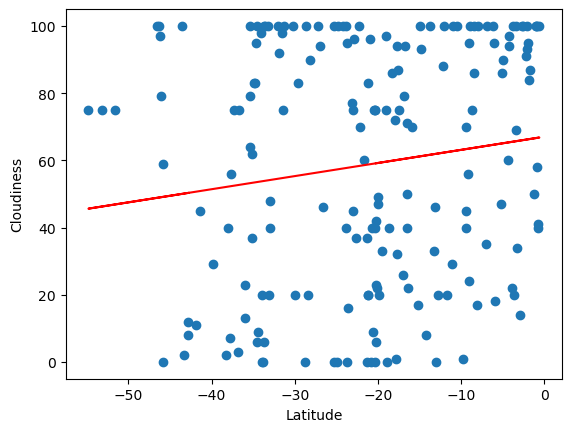

In [64]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y =" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(f"The r-value is: 0.02056735429994368")
print(f"y=0.39x + 67.02")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** 
in the southern hemisphere the regression does not display much of a correlation. in the northern data set the regression doesnt show much of a correlation either.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


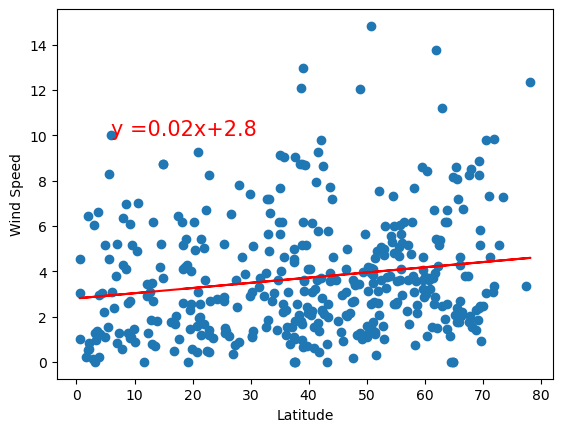

In [66]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y =" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(f"The r-value is: 0.030396762354449467")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.062239040700515696
y=-0.05x +3.14


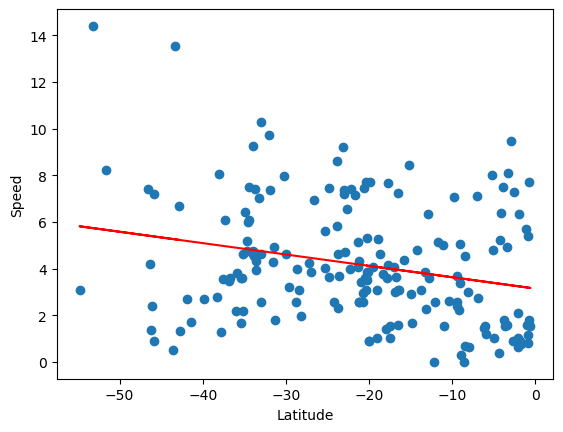

In [68]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y =" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(f"The r-value is: 0.062239040700515696")
print(f"y=-0.05x +3.14")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#the regression in the southern hemisohere with windspeed correlated to latitude shows a negative correlation as we see the slop go down as the latitude decreases
#moreover, the northern hemisphere in correlation with wind speed and latitude shows that theres not much of a correlation between either. although we see a small effect on latitude increase influencing windspeed theres too many outliers that showcase a non correlation.